# Programming in Julia

This notebook will teach you some of the basic programming routines in Julia. You will need these skills to complete the probabilistic programming assignments later on in the course. We will assume basic familiarity with programming, such as for-loops, if-else statements and function definitions.

Resources:
- [Julia documentation](https://docs.julialang.org/en/v1/)
- [Differences to Python, Matlab, C and Java](https://docs.julialang.org/en/v1/manual/noteworthy-differences/)
- [Video on getting started](https://www.youtube.com/watch?v=4igzy3bGVkQ&list=PLP8iPy9hna6SCcFv3FvY_qjAmtTsNYHQE)

## Data types

- References: [Numbers](https://docs.julialang.org/en/v1/base/numbers/), [Integers and Float](https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers/), [Strings](https://docs.julialang.org/en/v1/base/strings/), [Symbols](https://docs.julialang.org/en/v1/manual/metaprogramming/).

Numbers in Julia have specific types, most notably `Integer`, `Real` and `Complex`. It is important to be aware of what type your numbers are because many functions operate differently on different number types. 

In [1]:
a = 3
typeof(a)

Int64

`Int64` is a 64-byte integer. Other options are 32-,16-, or 8-bit integers and they can be unsigned as well. The default real-valued numbers is a 64-bit floating-point number:

In [2]:
a = 3.0
typeof(a)

Float64

Converting number types is easy:

In [3]:
a = convert(Float64, 2)
typeof(a)

Float64

Strings are constructed by enclosing symbols within double parentheses.

In [4]:
a = "3"
typeof(a)

String

They can be concatenated by multiplication (which is an example of a function, namely `*`, which acts differently on different input argument types): 

In [5]:
ab = "a"*"b"

"ab"

You can incorporate numbers into strings through a `$` call:

In [6]:
"a = $a"

"a = 3"

Julia also has a `Symbol` type, which is used for [meta-programming](https://docs.julialang.org/en/v1/manual/metaprogramming/) (not important for this course). A `Symbol` type is characterized by a `:` in front of a word. For example:

In [7]:
s = :foo
typeof(s)

Symbol

You will not have to use `Symbol`s in the course, but you may see one every once in a while in the lecture notes. For example, the `plot` command (see Visualization section), may have a `markershape=:cross` argument.

## Array manipulation

- References: [Arrays](https://docs.julialang.org/en/v1/base/arrays/)

Arrays are indexed with square brackets, `A[i,j]`. You can construct a matrix by enclosing a set of numbers with square brackets. If you separate your numbers with comma's, then you will get a column vector:

In [8]:
x = [1,2,3,4]

4-element Vector{Int64}:
 1
 2
 3
 4

If you use spaces, then you will construct a row vector (i.e., a matrix of dimensions 1 by n):

In [9]:
x = [1 2 3 4]

1×4 Matrix{Int64}:
 1  2  3  4

Matrices can be constructed by separating elements with spaces and rows by semicolons:

In [10]:
X = [1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

Common array constructors are:

In [11]:
X = zeros(2,3)
Y = ones(2,3)
Z = randn(2,3)

2×3 Matrix{Float64}:
  1.89942   1.58604    0.790389
 -0.243699  0.464712  -0.0802384

Matrix operations are intuitive and similar to the mathematical notation:

In [12]:
A = [3 2 1; 2 3 2; 1 2 3]
x = [0, 1, 2]
b = A*x

3-element Vector{Int64}:
 4
 7
 8

A matrix can be transposed by a single parenthesis, `A'`. Note that this does not mutate the array in memory. It just tells functions defined for matrices that it should change how it indexes the matrix's elements.

In [13]:
c = x'*A*x

23

## Broadcasting

- Reference: [Broadcasting](https://docs.julialang.org/en/v1/manual/arrays/#Broadcasting)

You can apply functions to elements in an array by placing a dot in front:

In [14]:
 3 .*[1 2 3]

1×3 Matrix{Int64}:
 3  6  9

This also works for named functions:

In [15]:
sin.([1., 2., 3.])

3-element Vector{Float64}:
 0.8414709848078965
 0.9092974268256817
 0.1411200080598672

## Iteration

- Reference: [Collections](https://docs.julialang.org/en/v1/base/collections/)

For-loops are one of the simplest forms of iteration and can be defined in a number of ways. First, the matlab way:

In [16]:
for n = 1:2:5
    println(n)
end

1
3
5


Next, we can use the `range` command to construct an array of numbers and then use the `in` command to loop over elements in the array:

In [17]:
num_range = range(0, stop=4, length=2)
for n in num_range
    println(n)
end

0.0
4.0


If you need both the index and the value of the array element, you can use the `enumerate` command:

In [18]:
for (j,n) in enumerate(num_range)
    println("$j, $n")
end

1, 0.0
2, 4.0


You may be familiar with "list comprehension", which is a shortened form of iterating through a collection:

In [19]:
["n = $n" for n in num_range]

2-element Vector{String}:
 "n = 0.0"
 "n = 4.0"

## Control flow

- References: [Control flow](https://docs.julialang.org/en/v1/manual/control-flow/), [Logical Operators](https://docs.julialang.org/en/v1/manual/missing/#Logical-operators)

Control flow refers to redirecting how a compiler goes through a program. Instead of traversing it line-by-line, things like `if-else` statements can make a compiler skip steps. These require logical operations: you can use `==` to check if two variables have the same value, `===` to check if they are actually the same object (i.e., same memory reference) and `!=` to check if they're not equal.

In [20]:
a = 3.0
if a < 0 
    println("Negative")
elseif a == 0
    println("0.0")
else 
    println("Positive")
end

Positive


Simple `if-else` statements can often be replaced by `ternary` checks. Essentially, you ask a question (a logical operation followed by `?`) and then tell the program what to do when the answer is yes (written immediately after the question) or no (written after the yes-answer followed by a `:`).

In [21]:
a > 0 ? println("Positive") : println("Not positive")

Positive


## Functions

- References: [Functions](https://docs.julialang.org/en/v1/manual/functions/), [Mutation](https://docs.julialang.org/en/v1/manual/style-guide/#bang-convention)

Function and expressions are a core component of the julia language. Its "multiple dispatch" feature means that you can define multiple functions with the same name but with behaviour that depends on the input argument types. When you're starting out, you may not notice this so much, but you will start to appreciate this feature tremendously when you begin to professionally develop software.

In [22]:
function foo(bar::Float64)
    message = "Boo!"
    return message
end

function foo(bar::Integer)
    message = "Bah!"
    return message
end

foo(1)

"Bah!"

Note that the `return` argument does not need to be at the end of a function ([the return keyword](https://docs.julialang.org/en/v1/manual/functions/#The-return-Keyword)).

You don't actually need the `function` keyword if you have simple enough functions:

In [23]:
fn(x::Number) = 1/x
fn(4)

0.25

You can add keyword arguments to a function, which are input arguments with default values:

In [24]:
fn(; number::Number = 1) = 1/number
[fn() fn(number=3)]

1×2 Matrix{Float64}:
 1.0  0.333333

Functions that modify their input arguments instead of creating new output variables are typically marked with an `!`. Below I have defined an unsorted vector and I call `sort` to sort it in increasing order. If I call the sort function and the original vector, then they will be different:

In [25]:
x = [1, 3, 2]
[sort(x) x]

3×2 Matrix{Int64}:
 1  1
 2  3
 3  2

But if I call the `sort!` function and the original vector, you'll see that the original vector is now also sorted.

In [26]:
[sort!(x) x]

3×2 Matrix{Int64}:
 1  1
 2  2
 3  3

## Software packages

- Reference: [Packages and modules](https://docs.julialang.org/en/v1/manual/faq/#Packages-and-Modules)

Just like with Python, there are thousands of additional software packages that can be imported to provide specific functionalities. You'll encounter some of the most common ones throughout the course. 

We have provided an "environment" that automatically downloads all the packages you need throughout the course. The three lines of code below point to the environment specification itself, a Project.toml file containing a list of packages, and construct the environment. If the specified packages are not installed, then these will be automatically added. This will take a bit of time the first time you run it, but it will only take a few seconds afterwards.

In [27]:
using Pkg
Pkg.activate(".")
Pkg.instantiate();

  Activating new project at `~/syndr/Wouter/Onderwijs/Vakken/tueindhoven/5SSD0 - Bayesian Machine Learning & Information Processing/2024-2025 Q2/BMLIP/lessons/notebooks`
  No Changes to `~/syndr/Wouter/Onderwijs/Vakken/tueindhoven/5SSD0 - Bayesian Machine Learning & Information Processing/2024-2025 Q2/BMLIP/lessons/notebooks/Project.toml`
  No Changes to `~/syndr/Wouter/Onderwijs/Vakken/tueindhoven/5SSD0 - Bayesian Machine Learning & Information Processing/2024-2025 Q2/BMLIP/lessons/notebooks/Manifest.toml`


Below are some examples of importing packages and using their added functionalities.

In [28]:
using LinearAlgebra

E,V = eigen([3. 2.;2. 0.4])

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -0.6853720883753125
  4.085372088375313
vectors:
2×2 Matrix{Float64}:
  0.476976  -0.878916
 -0.878916  -0.476976

In [29]:
using DataFrames

x = Dict(
    "a" => 1,
    "b" => 2,
    "c" => 3
)

df = DataFrame(x)

Row,a,b,c
,Int64,Int64,Int64
1,1,2,3


In [30]:
using Distributions

px = Normal(1.0, 0.5)
pdf(px, 0.0)

0.10798193302637613

## Visualization

- Reference: [Plots.jl](https://github.com/JuliaPlots/Plots.jl)

Plots.jl provides a common interface to call various other visualization backends (GR, Matplotlib, PGFPlotsX, Plotly, etc.). In other words, commands like `plot(..)` will be translated into the appropriate command for the backend. So, it does not re-invent the wheel but rather gives you access to the already enormous field of visualization tools.

Below are a few examples of the most common visualization commands you'll see throughout the course. The core principle is to use a `plot` type as base command and then provide keyword arguments (in `String`, `Number` or `Symbol` type) to apply variations.

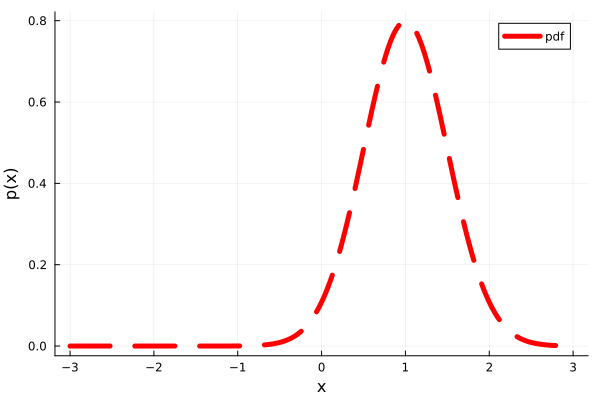

In [31]:
using Plots

x = range(-3, stop=3, length=301)
plot(x, pdf.(px, x), xlabel="x", ylabel="p(x)", label="pdf", color="red", linewidth=5, linestyle=:dash)

`plot` and `scatter` are the most useful commands. A `scatter` command will ignore properties such as `linewidth` and `linestyle` (since there are no lines) and will listen to `markersize` and `markershape` commands (see [Supported Attributes](https://docs.juliaplots.org/stable/generated/supported/) in the API).

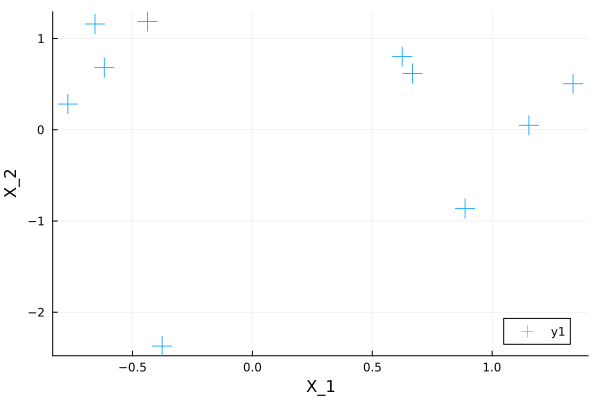

In [32]:
X = randn(10,2)
scatter(X[:,1], X[:,2], xlabel="X_1", ylabel="X_2", markersize=10, markershape=:cross)

It is possible to add plots to the same figure by using a `!` added to your plot command.

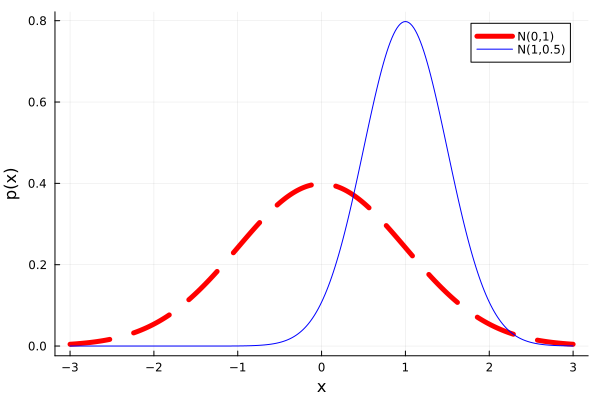

In [33]:
plot(x, pdf.(Normal(0.,1.), x), xlabel="x", ylabel="p(x)", label="N(0,1)", color="red", linewidth=5, linestyle=:dash)
plot!(x, pdf.(Normal(1.,0.5), x), xlabel="x", ylabel="p(x)", label="N(1,0.5)", color="blue", linestyle=:solid)

## Macro's

- References: [Macros](https://docs.julialang.org/en/v1/manual/metaprogramming/#man-macros)

Words that start with the `@` symbol are "macro"'s in Julia, for example `@time, @test, @model`. They represent a series of functions called on an input structure and are really handy when you have to use the same set of instructions often. 

For example, you could define a `ProgressMeter` bar, update it at every iteration of a for-loop and write a custom print statement every time. _Or_, you could call the `@showprogress` macro on the for-loop itself:

In [34]:
using ProgressMeter

@showprogress for n in 1:10
    sleep(0.1)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


Macro's are a somewhat advanced form of metaprogramming. You will not need to define any new macro's; this instruction is just here to explain what they are.

## Errors

- References: [Stack traces](https://docs.julialang.org/en/v1/manual/stacktraces/)

When you call a function that Julia doesn't know, it will return a list of the steps it took to execute your command and point to where its progress was blocked. This is highly useful but it typically requires a bit of practice to parse (i.e., read and filter) stack traces.

Suppose we write a function that expects an `Integer` input and call that function with an `Float64` argument:

In [35]:
function add1(a::Integer)
    return a + 1
end

add1(3.0)

MethodError: MethodError: no method matching add1(::Float64)

Closest candidates are:
  add1(!Matched::Integer)
   @ Main ~/syndr/Wouter/Onderwijs/Vakken/tueindhoven/5SSD0 - Bayesian Machine Learning & Information Processing/2024-2025 Q2/BMLIP/lessons/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y123sZmlsZQ==.jl:1


Note that we first of all get a `MethodError`. This points to the fact that Julia could not find the function (i.e, method) that you asked for; `add1(::Float64)` does not exist.

Furthermore, Julia provides a list of "Closest candidates" which are functions of the same name with different input arguments. It reports:
```
Closest candidates are:
  add1(!Matched::Integer)
```

You should read this as "there exists a function called `add1` that expects an `Integer` input." Try that.

In [36]:
add1(3)

4

The `!Matched` is also important but requires a slightly more complicated example. Suppose we have a function with two `Integer` inputs and we call with `Float64` and `Int64` arguments.

In [37]:
function add(a::Integer, b::Integer)
    return a+b
end

add(3.0,4)

MethodError: MethodError: no method matching add(::Float64, ::Int64)

Closest candidates are:
  add(!Matched::Integer, ::Integer)
   @ Main ~/syndr/Wouter/Onderwijs/Vakken/tueindhoven/5SSD0 - Bayesian Machine Learning & Information Processing/2024-2025 Q2/BMLIP/lessons/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y130sZmlsZQ==.jl:1


We again get the `MethodError` that the function we asked for doesn't exist and a suggested alternative (i.e., "closest candidate"). But note that in that alternative, `add(!Matched::Integer, ::Integer)`, only one of the inputs is `!Matched`. So, in fact, Julia check your input argument types against those in the closest candidates. This tells you _what_ to change: if you change the first argument of your function call to an `Integer` type, then this closest candidate will be evaluated.


In [38]:
add(3,4)

7

To summarize, when you get an error, it is important to read the stack trace. It may tell you that you need only change a small thing for your code to work.

The type of error can also be informative. The `MethodError` is probably the error you will see most often. Another important error is the `UndefVarError`, which occurs when you call a variable that was not defined. For example:

In [39]:
y = 3*aa

UndefVarError: UndefVarError: `aa` not defined

The solution to this, of course, is to define the variable first. Sometimes this error occurs through a spelling mistake. You will encounter objects in the course called `MvNormalMeanCovariance`. If you misremember that name and write `MvNormalMeanVariance`, this will happen:

In [40]:
aa = MvNormalMeanVariance()

UndefVarError: UndefVarError: `MvNormalMeanVariance` not defined

Next to errors, it is also important to check line numbers in a stack trace. For example, the cell below contains a mistake and evaluating it will throw an error. But which line has the mistake?

In [41]:
yy = 3*2
zz = 3*yy
xx = yy*xx
zz = yy*xx

UndefVarError: UndefVarError: `xx` not defined

At the end of the line, right after the specific function call there is a `: <linenumber>`, which will tell you where to look.

## Closing

That's it for now. If you encounter mysterious errors, please let us know on [Piazza](https://piazza.com/tue.nl/winter2025/5ssd0). We can add them to this primer.